# Well Tempered Data

## Weather Analysis Visualization

### Part 3: Calculate and plot the 11 year average for the daily temperatures

In [1]:
import os
import sys
from dotenv import load_dotenv

project_dir = os.path.join(os.pardir, os.pardir)

# add local python functions
sys.path.append(os.path.join(project_dir, "src"))

# get darksky.io API KEY end other keys from `~/.env`
load_dotenv(os.path.join(os.path.expanduser('~'), ".env"))

In [2]:
import pandas as pd
import numpy as np
import json
from datetime import date, datetime

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # retina display

mpl.style.use('seaborn-whitegrid')
style_fn = os.path.join(project_dir, 'src', 'visualization', 'display.mplstyle')
plt.style.use(style_fn)

Specify when notebook was run, and with which packages. Specially useful for nbview, blog posts, and other media where the notebook is not being shared as executable code.

In [3]:
%load_ext watermark
%watermark -a "J. Bruno Morgado" -d -t -v -p jupyter,numpy,pandas,matplotlib,seaborn -g

J. Bruno Morgado 2018-01-21 13:20:25 

CPython 3.6.4
IPython 6.2.1

jupyter 1.0.0
numpy 1.13.3
pandas 0.21.1
matplotlib 2.1.1
seaborn 0.8.1
Git hash: cdd3ccad307f135b5cc8c55dc2db16243b907649


## Define the variables of the plot
Needed variables:
- obs_lyr: (int) last year of the 11 year cycle
- obs_loc: (str) location name

In [4]:
obs_lyr = 2017
obs_loc = 'Porto, Portugal'

## Import daily interim pickled data
- Import the interim pandas pickled data for a location that was previously converted from the JSON raw data.

In [5]:
import glob
import re

def get_daily_observations(location):
    """ Takes the location and returns a pandas dataframe with the daily observations.
        
        :param str location: Observation location
        :returns pandas.DataFrame: Ddaily weather observations
    """
    obs_folder = os.path.normpath(os.path.join(project_dir,
                                               'data',
                                               'interim'))
    location_pkl_file = os.path.join(obs_folder, location + '_daily.xz')

    # read pickled file
    observations = pd.read_pickle(location_pkl_file)

    return observations

### Display the data

In [6]:
daily = get_daily_observations(obs_loc)
with pd.option_context('display.max_rows', 2, 'display.max_columns', None):
    display(daily)

,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,cloudCoverError,dewPoint,dewPointError,humidity,humidityError,icon,moonPhase,ozone,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,pressure,pressureError,summary,sunriseTime,sunsetTime,temperatureHigh,temperatureHighError,temperatureHighTime,temperatureLow,temperatureLowError,temperatureLowTime,temperatureMax,temperatureMaxError,temperatureMaxTime,temperatureMin,temperatureMinError,temperatureMinTime,uvIndex,uvIndexTime,visibility,visibilityError,windBearing,windBearingError,windGust,windGustTime,windSpeed,windSpeedError
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1901-12-31 23:59:45-00:37,12.43,1902-01-01 13:59:45-00:37,4.75,1902-01-02 04:59:45-00:37,12.43,1902-01-01 13:59:45-00:37,4.77,1902-01-01 04:59:45-00:37,0.52,0.3,6.07,2.58,0.82,0.14,partly-cloudy-day,0.74,NaN,NaN,NaN,NaT,NaN,rain,1021.94,9.37,Partly cloudy throughout the day.,1902-01-01 07:24:15-00:37,1902-01-01 16:41:07-00:37,12.43,2.52,1902-01-01 13:59:45-00:37,6.35,3.53,1902-01-02 04:59:45-00:37,12.43,2.52,1902-01-01 13:59:45-00:37,6.37,3.53,1902-01-01 04:59:45-00:37,NaN,NaT,9.95,4.18,134,61.12,NaN,NaT,1.3,2.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,12.44,2017-12-31 14:00:00+00:00,4.77,2018-01-01 05:00:00+00:00,12.44,2017-12-31 14:00:00+00:00,4.79,2017-12-31 05:00:00+00:00,0.52,0.3,6.10,2.58,0.82,0.14,partly-cloudy-day,0.44,NaN,NaN,NaN,NaT,NaN,rain,1021.77,9.37,Partly cloudy throughout the day.,2017-12-31 08:01:02+00:00,2017-12-31 17:16:22+00:00,12.44,2.52,2017-12-31 14:00:00+00:00,6.37,3.53,2018-01-01 05:00:00+00:00,12.44,2.52,2017-12-31 14:00:00+00:00,6.39,3.53,2017-12-31 05:00:00+00:00,NaN,NaT,9.93,4.18,135,61.20,NaN,NaT,1.3,2.36


### Plot the temperature data for the last 11 years

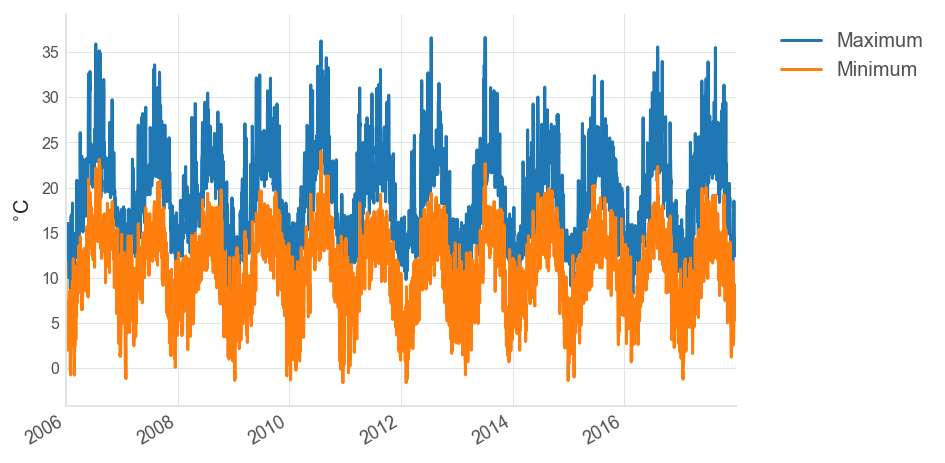

In [7]:
fig, ax = plt.subplots(1)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)  
ax.grid(True)

ax.plot(daily.temperatureMax, label="Maximum")
ax.plot(daily.temperatureMin, label="Minimum")
ax.set_xlim("2006-1-1", "2017-12-31")
fig.autofmt_xdate() # auto rotate the x labels if needed
ax.set_ylabel('$^{\circ}$C')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

## Create daily averages for the desired quantities

Pick a set of years, group it with `groupby` month and day and then get the mean for those indexes.

In [8]:
def get_daily_mean(observations, start_y, end_y, columns):
    """ Takes the daily observations, start and end year and the desired columns
        and returns a dataframe with all days (except 29th of Feb.) and
        the mean of the column for each day.
        
        :param pandas.DataFrame daily observations: Several years of daily observations;
        :param int start_y: Start year;
        :param int end_y: End year;
        :param [str] columns: Columns for each to calculate the mean;
        :returns pandas.DataFrame: Mean of the observations.
    """
    observations = observations[columns]
    
    mask = (observations.index >= str(date(start_y,1,1))) & (observations.index <= str(date(end_y,12,31)))
    observations = observations.loc[mask]
    observations = observations.groupby([observations.index.month, observations.index.day])
    observations = observations.mean()
    
    # Remove the 29th of February
    observations.drop((2,29), inplace=True)
    
    # Remove the multiindex and set the year for easier ploting
    idx = pd.to_datetime(observations.index.map(lambda x: str(end_y) + '-' + str(x[0]) + '-' + str(x[1])))
    observations = observations.reset_index(drop=True).set_index(idx)

    return observations

### Get daily means for the temperature

Here we use an 11 year period for calculating the mean. This is due to the solar magnetic cycle and it's implications on the planet.

In [9]:
daily_mean = get_daily_mean(daily, obs_lyr-11, obs_lyr, ['temperatureMax', 'temperatureMin'])

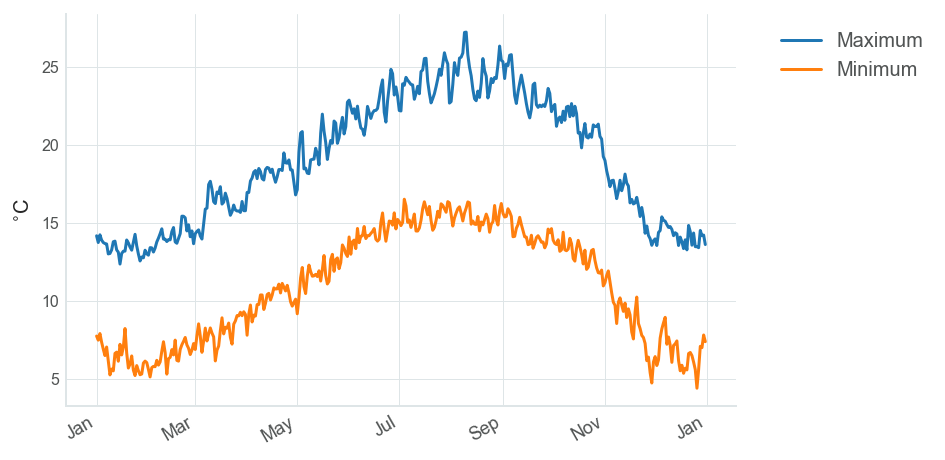

In [10]:
fig, ax = plt.subplots(1)

# visuals
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)  
ax.grid(True)

ax.plot(daily_mean.temperatureMax, label="Maximum")
ax.plot(daily_mean.temperatureMin, label="Minimum")
fig.autofmt_xdate() # auto rotate the x labels if needed
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('$^{\circ}$C')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

### Create helper routines to automate the R axis

In [11]:
def round_down(num, divisor):
    return int(num - (num % divisor))

def round_up(num, divisor):
    return int(num if num % divisor == 0 else num + divisor - num % divisor)

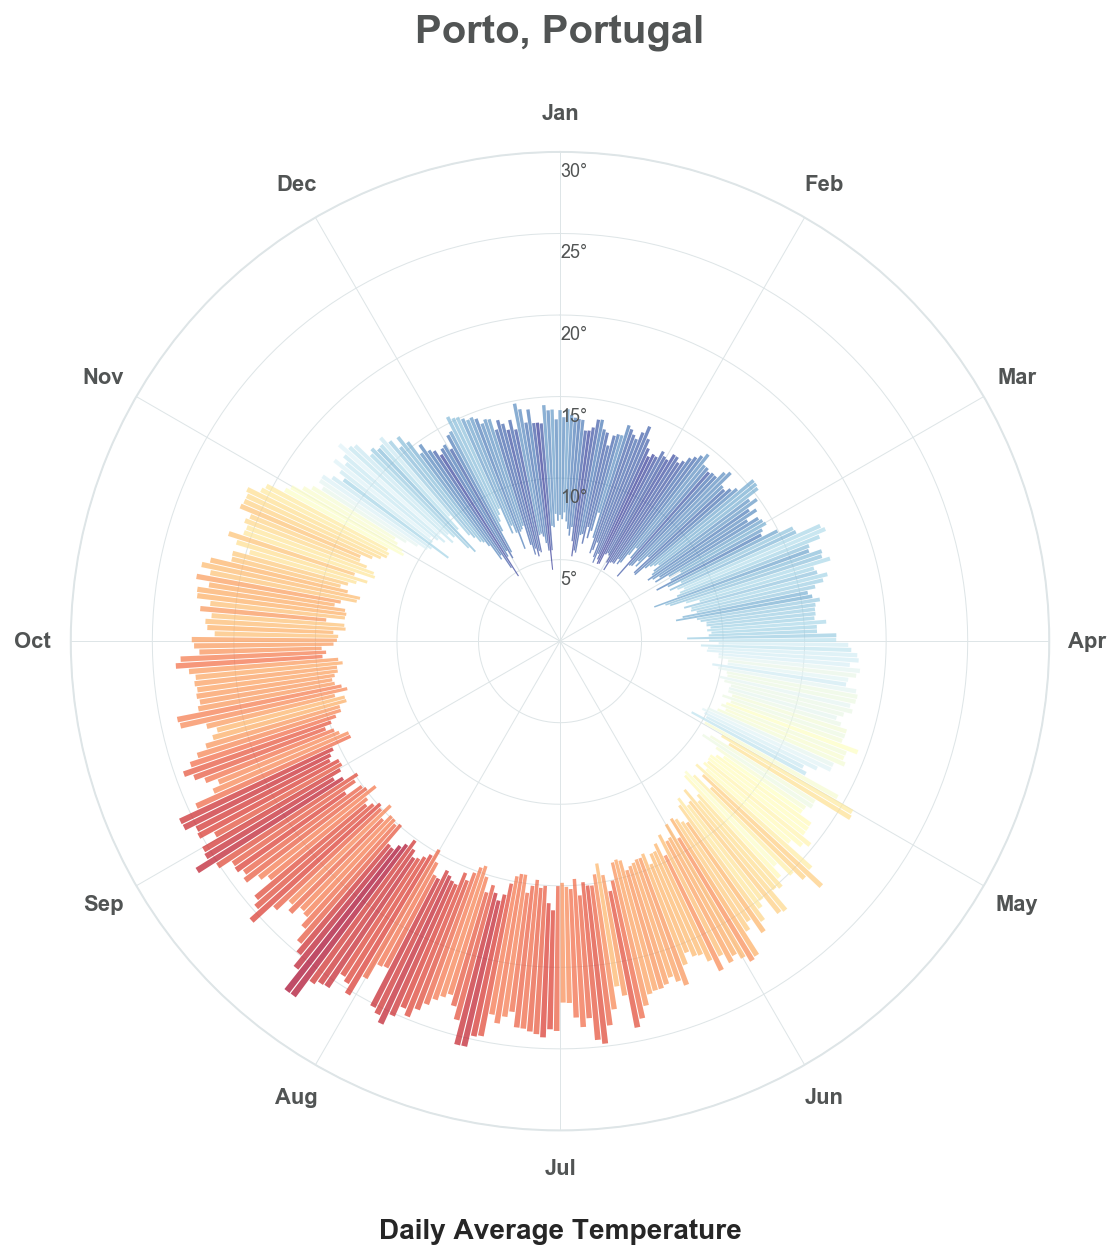

In [12]:
daily = daily_mean
obs_year = obs_lyr

plt.rcParams['figure.figsize'] = (9,9)

def draw_yticks(axes, positions, suffix=None):
    """ Takes an matplolib axes object and the y positions and
        draws the axes label ticks in a polar plot.
        
        :param matplotlib.axis: An axis object;
        :param [int] positions: The positions to draw the axis.
        :param str suffix: An optional suffix to add to the ticks labels.
        :returns Null: Works in place.
    """    
    max_r = max(positions)
    for pos in positions:
        label = str(pos) + suffix
        ax.text(0.00, pos-max_r*0.05, label, fontsize=9)

# calculate the shape sizes of the bars
N = len(daily)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = daily.temperatureMax - daily.temperatureMin
bottom = daily.temperatureMin
width = 0.84*(2*np.pi)/N
max_atemp = max(daily.temperatureMax+daily.temperatureMin)/2.
min_atemp = min(daily.temperatureMax+daily.temperatureMin)/2.
delta_atemp = max_atemp - min_atemp

ax = plt.subplot(111, projection='polar')

# set start, direction and limits
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
rd_axis_min = round_down(min(daily.temperatureMin), 5)
max_r = round_up(max(daily.temperatureMax), 5)
ax.set_ylim([rd_axis_min,max_r])

# define the locators
## x
x_pos_list = np.linspace(0.0, 2 * np.pi, 12, endpoint=False)
ax.xaxis.set_major_locator(ticker.FixedLocator((x_pos_list)))
ax.axes.yaxis.set_ticklabels([])
x_name_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_fontdict = {'fontsize': 11, 'fontweight': 'semibold'}
ax.set_xticklabels(x_name_list, fontdict=x_fontdict)
ax.tick_params(axis='x', which='major', pad=12, zorder=10)

# plt.xlabel(obs_year, fontweight='bold')
## y
rd_temp_max = round_up(max(daily.temperatureMax), 5)
rd_temp_min = round_up(min(daily.temperatureMin), 5)
y_pos_list = range(rd_temp_min, rd_temp_max+5, 5)
ax.yaxis.set_major_locator(ticker.FixedLocator((y_pos_list)))
draw_yticks(ax, y_pos_list, '°')

# draw bars
bars = ax.bar(theta, radii, width=width, bottom=bottom, zorder=3, clip_on=False)

# Use custom colors and opacity
# TODO: should use average or median temperature to determine color
for r, bar in zip((daily.temperatureMax + daily.temperatureMin)/2., bars):
    temp_var = (r - min_atemp)/delta_atemp
    bar.set_facecolor(plt.cm.RdYlBu_r(temp_var))
    bar.set_linewidth(0.0)
    bar.set_alpha(0.7)
    
# title
title_fontdict = {'fontsize': 20, 'fontweight': 'bold'}
plt.title(obs_loc, y=1.1, fontdict=title_fontdict)
plt.xlabel("Daily Average Temperature", fontsize=14, fontweight='semibold', labelpad=20)

plt.savefig(obs_loc + '.png')
plt.show()